# Sketching Out Plot Ideas 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import random

TICK_SIZE = 12
LABEL_PAD = 4
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=TICK_SIZE) 
plt.rc('ytick', labelsize=TICK_SIZE) 

### Comparing Test $R^2$ values among the molecular property regression tasks

In [2]:
df = pd.DataFrame({"task":["Hy", "MLOGP", "MLOGP2", "PDI", "SAacc", "SAdon", "SAtot", "TPSA", "Uc", "Ui", "VvdwMG", "Vx","VVdwZAZ"], 
                   "score": [0.9643305452643575, 0.9787119425034523, 0.6802948609290353, 0.9631949076161059, 0.9770647810053213,
                            0.9842434252532304, 0.9966715762626913, 0.9970814206014291, 0.9553585682026731,
                            0.9564923035091162, 0.9945346807470723, 0.99299460323343, 0.9942985645868737 ]}).sort_values(by="score",ascending=False)

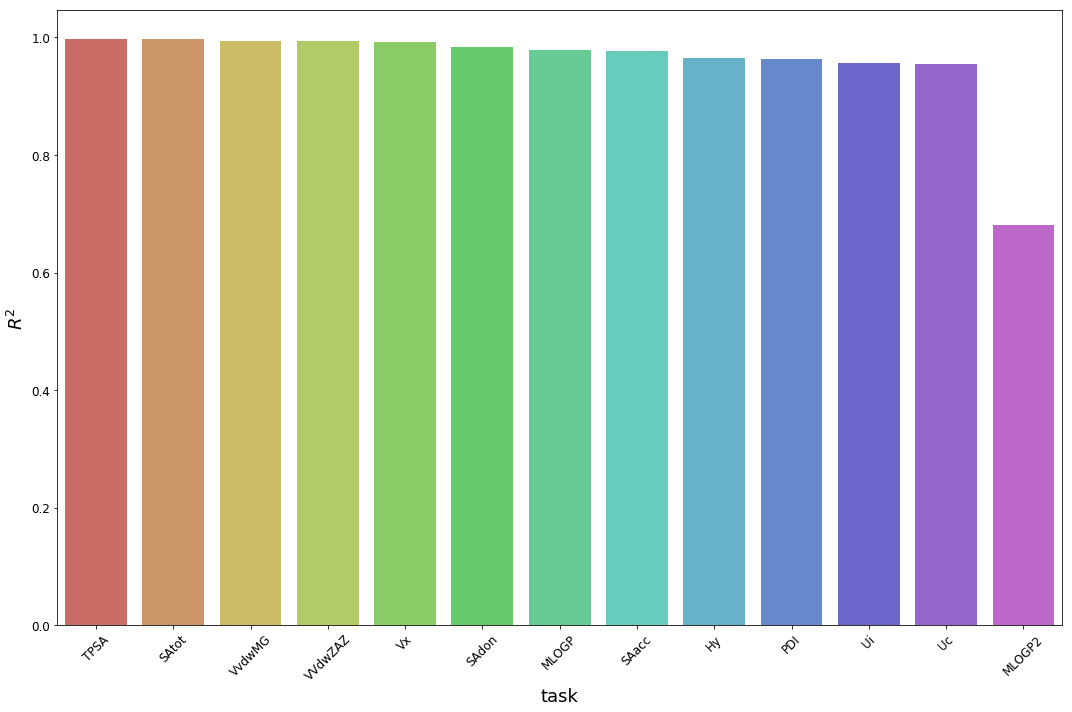

In [3]:
plt.clf()
plt.figure(figsize=(15,10))
g = sns.barplot("task", "score", data=df, palette=sns.color_palette("hls", 15))
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_ylabel("$R^{2}$")
plt.tight_layout()
plt.savefig('r2_per_task.png', format='png')

### Comparing Test F1-Scores (and or other metrics) versus number of processors

In [4]:
process_df = pd.read_csv("/home/derek/workspace/deep_protein_binding/best_model_search_test_results.csv", index_col=0)
process_df["n_process"] = process_df.path.str.split("_").apply(lambda x: x[6]).apply(lambda x: x.split("/")[0])
process_df["n_process"] = pd.to_numeric(process_df["n_process"])
process_df = process_df.sort_values(by="n_process")
process_df.head()
process_df = process_df.groupby("n_process").mean().reset_index()
process_df

,n_process,score
0,1,0.830669
1,2,0.851020
2,3,0.864519
3,4,0.866915
4,5,0.852988
5,6,0.868601
6,7,0.877444
7,8,0.864513
8,9,0.867444
9,10,0.854460


* Should I include the error bars which will show how much variance each point has associated with it? Does the confidence interval properly capture this?

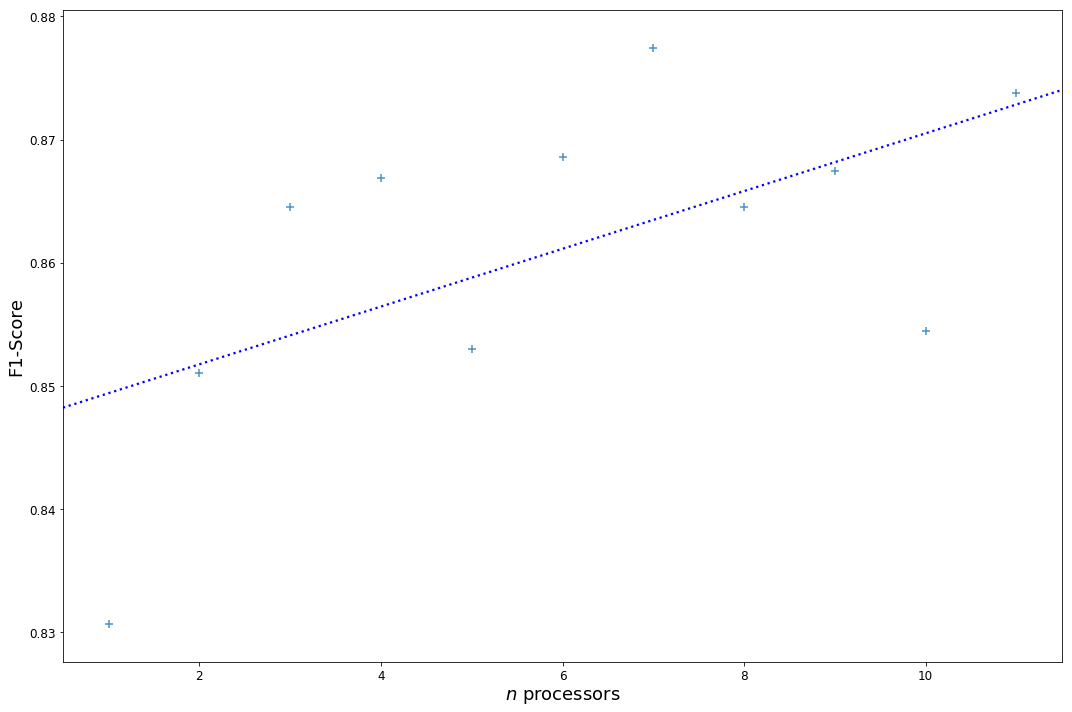

In [8]:
plt.clf()
plt.figure(figsize=(15,10))
g = sns.regplot(x="n_process", y="score", data=process_df, marker="+", 
            line_kws={'color':'blue', "linestyle": ":"}, scatter_kws={"s":60}, ci=None)
g.set_xlabel("$n$ processors")
g.set_ylabel("F1-Score")
plt.tight_layout()
plt.savefig('f1_vs_processors.png', format='png')